# ROC-AUC

Дублирует файл из соседней папки, тут комментарии

In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

Проверка на незаполненные значения (nan'ы) с помощью data.isna() или data.info() + замена

In [4]:
data = pd.read_csv('./train.csv')
# 5 рандомных строк
data.sample(n=5)

ClientPeriod  MonthlySpending  ...              PaymentMethod Churn
395             38           103.65  ...           Electronic check     0
776             67            88.40  ...  Bank transfer (automatic)     0
2356             6            69.10  ...           Electronic check     0
4395            12            98.10  ...           Electronic check     1
3177            48            29.50  ...    Credit card (automatic)     0

[5 rows x 20 columns]

In [5]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# подсчет НаНов по колонкам, вывод в виде Series
data.isna().sum()
data.info()
# Заметим, что в колонке TotalSpent данные - строки. Если посмотреть внимательно, то есть пустые строки, что может в дальнейшем может привести к ошибке
# Тут идет конвертация данных в числовые
data['TotalSpent'] = data['TotalSpent'].str.replace(' ','0')
data['TotalSpent'][1048]
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
#data['TotalSpent']
#type(data['TotalSpent'][1048])
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных

Для численных призанков -гистограмма. Для категориальных - количество каждого значения для каждого признака. 

(Существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0))

Гистограммы числовых признаков


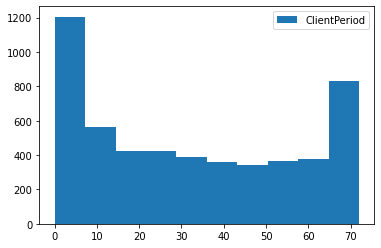

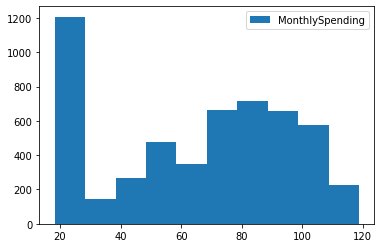

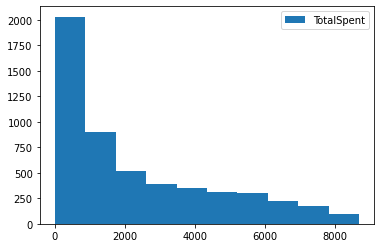

Гистограммы категориальных признаков по отдельности
Sex


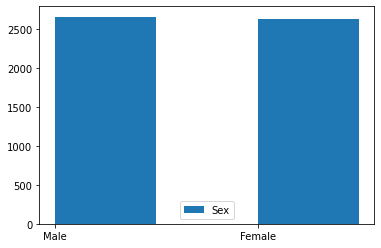

IsSeniorCitizen


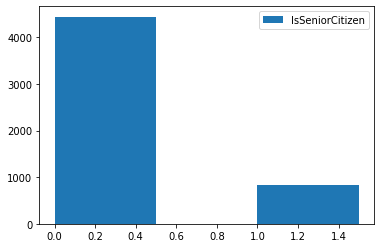

HasPartner


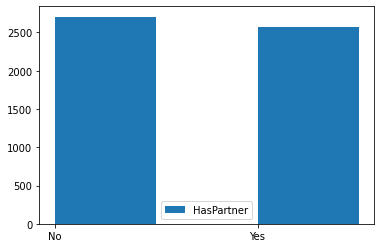

HasChild


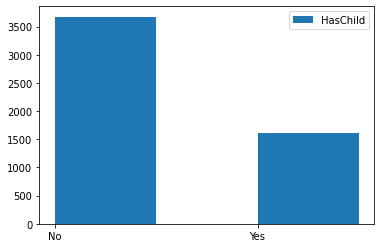

HasPhoneService


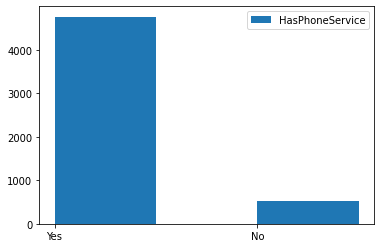

HasMultiplePhoneNumbers


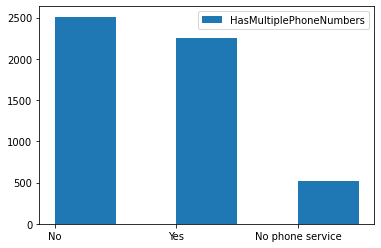

HasInternetService


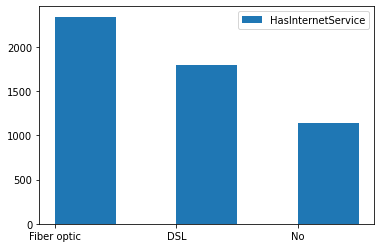

HasOnlineSecurityService


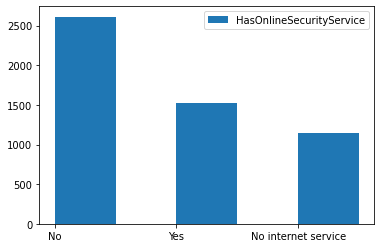

HasOnlineBackup


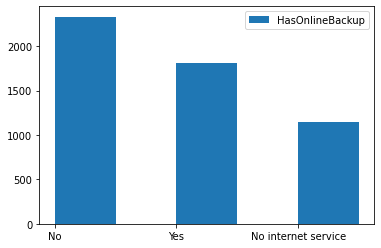

HasDeviceProtection


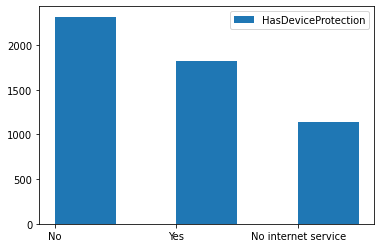

HasTechSupportAccess


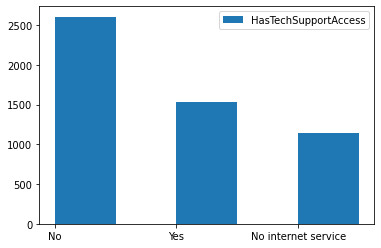

HasOnlineTV


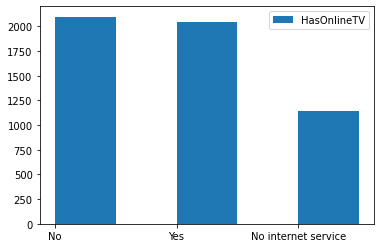

HasMovieSubscription


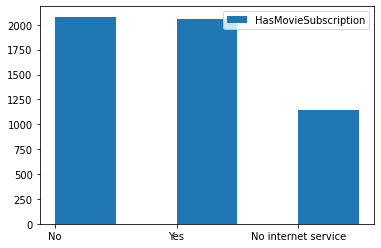

HasContractPhone


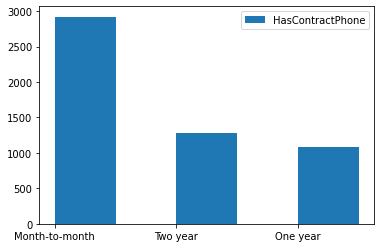

IsBillingPaperless


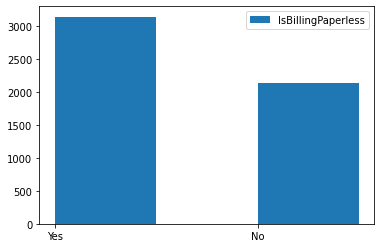

PaymentMethod


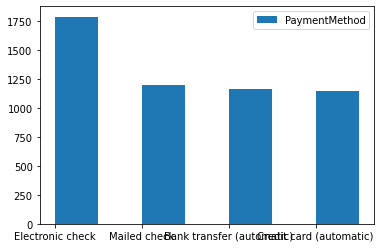

Гистограмма всех категориальных признаков


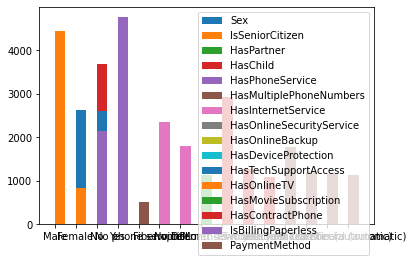

<BarContainer object of 2 artists>

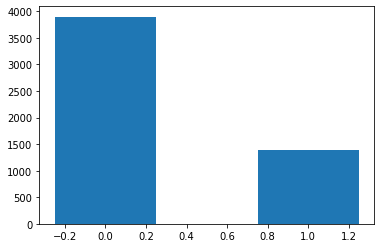

In [7]:
# YOUR CODE
print("Гистограммы числовых признаков")
for i in num_cols:
  plt.hist(data[i].values, label=i)
  plt.legend()
  plt.show()
print("Гистограммы категориальных признаков по отдельности")
for j in cat_cols:
  print(j)
  plt.bar(data[j].value_counts().index, data[j].value_counts().values, label=j, width=0.5, align='edge')
  plt.legend()
  plt.show()
print("Гистограмма всех категориальных признаков")
fig, ax = plt.subplots()
for j in cat_cols:
  #print(j)
  ax.bar(data[j].value_counts().index, data[j].value_counts().values, label=j, width=0.5, align='edge')
  ax.legend()
plt.show()
plt.bar(data[target_col].value_counts().index, data[target_col].value_counts().values, label=j, width=0.5)

## Применение линейных моделей

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Кроссвалидация: преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [14]:
# преобразую данные. В фрейме X категориальные данные преобразованы для обучения LogisticRegression,
# в X_origin данные не изменены (потом будет использован в catboost) 
numeric_data = data[num_cols]
categorial_data = data[cat_cols]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(numeric_data))
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([X_scaled, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
y = data['Churn']



#делаю 2 метод с кросс-валидацией
parameters = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

'''pipe = make_pipeline(
    #LabelEncoder(),
    OneHotEncoder(handle_unknown = 'ignore', sparse=False),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)'''

CV_model = GridSearchCV(LogisticRegression(max_iter=10000), 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1)

CV_model.fit(X.to_numpy(), y)

means = CV_model.cv_results_['mean_test_score']
means
# best C is 10

array([0.84511114, 0.84511212, 0.8449842 , 0.8440914 , 0.8414255 ,
       0.8370935 ])

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [36]:
# YOUR CODE
!pip install catboost
import catboost
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=250,
                                             cat_features=np.array([data.columns.get_loc(c) for c in cat_cols if c in data]),
                                             silent=True,
                                             eval_metric='AUC')

#boosting_model.fit(X_train_origin, y_train)

'''y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
test_auc'''
boosting_model.grid_search({'learning_rate': np.linspace(0, 0.1, 100)}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8315181447
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8315181	best: 0.8315181 (0)	total: 2.71s	remaining: 4m 28s

bestTest = 0.8302133655
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8302134	best: 0.8315181 (0)	total: 5.39s	remaining: 4m 24s

bestTest = 0.8303930872
bestIteration = 21

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8303931	best: 0.8315181 (0)	total: 8.1s	remaining: 4m 22s

bestTest = 0.8302924431
bestIteration = 42

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8302924	best: 0.8315181 (0)	total: 10.9s	remaining: 4m 21s

best

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [37]:
best_model = boosting_model.fit(X_train_origin, y_train)
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
test_auc

0.8231476436309233

In [115]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = pd.DataFrame(best_model.predict_proba(X_test))[1]
submission.to_csv('./my_submission.csv', index=False)
submission.head()

Id     Churn
0   0  0.024955
1   1  0.713778
2   2  0.685014
3   3  0.020445
4   4  0.001944

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.